In [1]:
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scanpy as sc
from matplotlib import pyplot as plt
import scmulti

In [4]:
%config InlineBackend.figure_format = 'retina'

In [12]:
x = [[1, 2], [2]]

In [15]:
flat_list = [item for sublist in x for item in sublist]

In [313]:
for x, _,_,_,_, label in dl:
    print(x)
    y = torch.stack([torch.cat((cell, self.batch_vector(batch_labels[i])[0])) for cell in x])

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.8388, 3.9107, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 4.8950, 4.4530, 0.0000]])
tensor([[0.0000, 0.0000, 0.0000,  ..., 4.6043, 4.1049, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 4.7918, 4.0513, 0.0000]])
tensor([[0.0000, 0.0000, 0.0000,  ..., 4.3217, 3.0090, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.4313, 4.2541, 0.0000]])
tensor([[0.0000, 0.0000, 0.0000,  ..., 4.9140, 4.2719, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.3565, 4.6681, 0.0000]])
tensor([[0.0000, 0.0000, 0.0000,  ..., 4.5772, 3.7912, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.4651, 4.6935, 0.0000]])


In [50]:
import scmulti.datasets

In [51]:
import torch
#from torch import nn
from torch.nn import functional as F

In [73]:
x = F.one_hot(torch.tensor([int('0')]).long(), 3).float()
y = F.one_hot(torch.tensor([int('1')]).long(), 3).float()

In [221]:
x[0]

tensor([1., 0., 0.])

In [222]:
y[0]

tensor([0., 1., 0.])

In [88]:
z = torch.cat((x[0], y[0]))

In [89]:
z

tensor([1., 0., 0., 0., 1., 0.])

In [225]:
torch.stack((x[0], y[0]), dim=0)

tensor([[1., 0., 0.],
        [0., 1., 0.]])

In [227]:
d = scmulti.datasets.SingleCellDataset(scrna[:10, ], 'hello',
        '0',
        '0', batch_size = 2, batch_label = 0)

In [165]:
len(next(iter(d))[0])

3999

In [166]:
next(iter(d))

(tensor([0.0000, 0.0000, 0.0000,  ..., 4.8388, 3.9107, 0.0000]),
 'naive CD4 T cells')

In [228]:
dl = d.loader

In [231]:
from itertools import cycle

In [300]:
for iteration, datas in enumerate(zip(dl, dl)):
    for data in datas:
        xs = [data[0] for data in datas]
        modalities = [data[2] for data in datas]
        pair_groups = [data[3] for data in datas]
        batch_labels = [data[-1] for data in datas]

In [301]:
xs

[tensor([[0.0000, 0.0000, 0.0000,  ..., 4.5772, 3.7912, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 5.4651, 4.6935, 0.0000]]),
 tensor([[0.0000, 0.0000, 0.0000,  ..., 4.5772, 3.7912, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 5.4651, 4.6935, 0.0000]])]

In [261]:
torch.tensor(batch_labels[0]).float()

tensor(0.)

In [274]:
for i, x in enumerate(xs):
    xs2[i] = [cell**2 for cell in x]

In [276]:
F.one_hot(torch.tensor([(batch_labels[0])]).long(), 2).float()

tensor([[1., 0.]])

In [302]:
for i, x in enumerate(xs):
    xs[i] = torch.stack([torch.cat((cell, F.one_hot(torch.tensor([(batch_labels[i])]).long(), 2).float()[0])) for cell in x])
        

In [303]:
xs

[tensor([[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]])]

In [291]:
torch.stack(xs)

TypeError: expected Tensor as element 0 in argument 0, but got list

In [170]:
for iteration, datas in enumerate(dl):
    print(datas)
    for data in datas:
        print(data)
    
    xs = [data[0] for data in datas]
    print(xs)
    batches = [data[5] for data in datas]

    xs = [torch.cat((val, torch.tensor(batches[index]))) for index, val in enumerate(xs)]
    print(xs)

(tensor([[0.0000, 0.0000, 0.0000,  ..., 4.8388, 3.9107, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 4.8950, 4.4530, 0.0000]]), 'hello', '0', '0', ['naive CD4 T cells', 'memory CD4 T cells'], 0)
tensor([[0.0000, 0.0000, 0.0000,  ..., 4.8388, 3.9107, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 4.8950, 4.4530, 0.0000]])
hello
0
0
['naive CD4 T cells', 'memory CD4 T cells']
0


TypeError: 'int' object is not subscriptable

# Load the dataset

In [5]:
scrna = sc.read_h5ad('../data/10xpbmc10k-2020/expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 10000 × 3999
    obs: 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [6]:
scatac = sc.read_h5ad('../data/10xpbmc10k-2020/peaks.h5ad')
scatac

AnnData object with n_obs × n_vars = 10000 × 40018
    obs: 'cell_type', 'nb_features'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

# Configure and train the model

In [7]:
model = scmulti.models.MultiVAE(
    adatas=[[scrna], [scatac]],
    names=[['scRNA-seq'], ['scATAC-seq']],
    pair_groups=[[0], [0]],
    cond = True, #conditional
    z_dim=20,
    h_dim=128,
    hiddens=[],
    shared_hiddens=[],
    adver_hiddens=[],
    recon_coef=1,
    kl_coef=1e-5,
    integ_coef=1e-2,
    cycle_coef=0,
    adversarial=False,
    dropout=0.2,
)

In [8]:
model.train(
    n_iters=10000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0
)

 |██------------------| 10.0% iter=1001/10000, time=311.00(s), loss=0.3030, recon=0.2611, kl=35.3562, integ=4.1574, val_loss=17.0386, val_recon=0.2159, val_kl=46.2204, val_integ=2.3801
 |████----------------| 20.0% iter=2001/10000, time=307.03(s), loss=0.2365, recon=0.2201, kl=58.9981, integ=1.5832, val_loss=15.8053, val_recon=0.2115, val_kl=64.2605, val_integ=1.0603
 |██████--------------| 30.0% iter=3001/10000, time=310.47(s), loss=0.2199, recon=0.2124, kl=77.1766, integ=0.6661, val_loss=15.3984, val_recon=0.2102, val_kl=80.3213, val_integ=0.5981
 |████████------------| 40.0% iter=4001/10000, time=320.02(s), loss=0.2163, recon=0.2125, kl=94.8212, integ=0.2831, val_loss=15.1379, val_recon=0.2088, val_kl=98.6064, val_integ=0.3491
 |██████████----------| 50.0% iter=5001/10000, time=313.61(s), loss=0.2168, recon=0.2138, kl=109.9339, integ=0.1874, val_loss=15.0186, val_recon=0.2083, val_kl=113.0696, val_integ=0.2157
 |████████████--------| 60.0% iter=6001/10000, time=309.75(s), loss=0.212

## Plot training history

In [9]:
model.history

,iteration,train_loss,train_recon,train_kl,train_integ,val_loss,val_recon,val_kl,val_integ
0,1000,0.303007,0.261079,35.356152,4.157396,17.038555,0.215899,46.220426,2.380058
1,2000,0.236476,0.220054,58.998062,1.583193,15.805342,0.211464,64.260514,1.060322
2,3000,0.219854,0.212422,77.176556,0.666087,15.398394,0.210176,80.321331,0.598139
3,4000,0.216327,0.212548,94.821236,0.283067,15.137939,0.208820,98.606404,0.349096
4,5000,0.216798,0.213825,109.933852,0.187394,15.018565,0.208334,113.069592,0.215746
5,6000,0.212919,0.210619,120.627464,0.109360,14.920718,0.207847,124.057860,0.113761
6,7000,0.217137,0.215012,131.110397,0.081425,14.825455,0.207093,131.740788,0.047717
7,8000,0.210434,0.208521,138.841867,0.052460,14.780357,0.206658,134.540766,0.024658
8,9000,0.213682,0.211800,137.846448,0.050286,14.744149,0.206211,138.582059,0.014760
9,9999,0.210944,0.209048,141.780856,0.047865,14.716913,0.205820,141.044202,0.013373


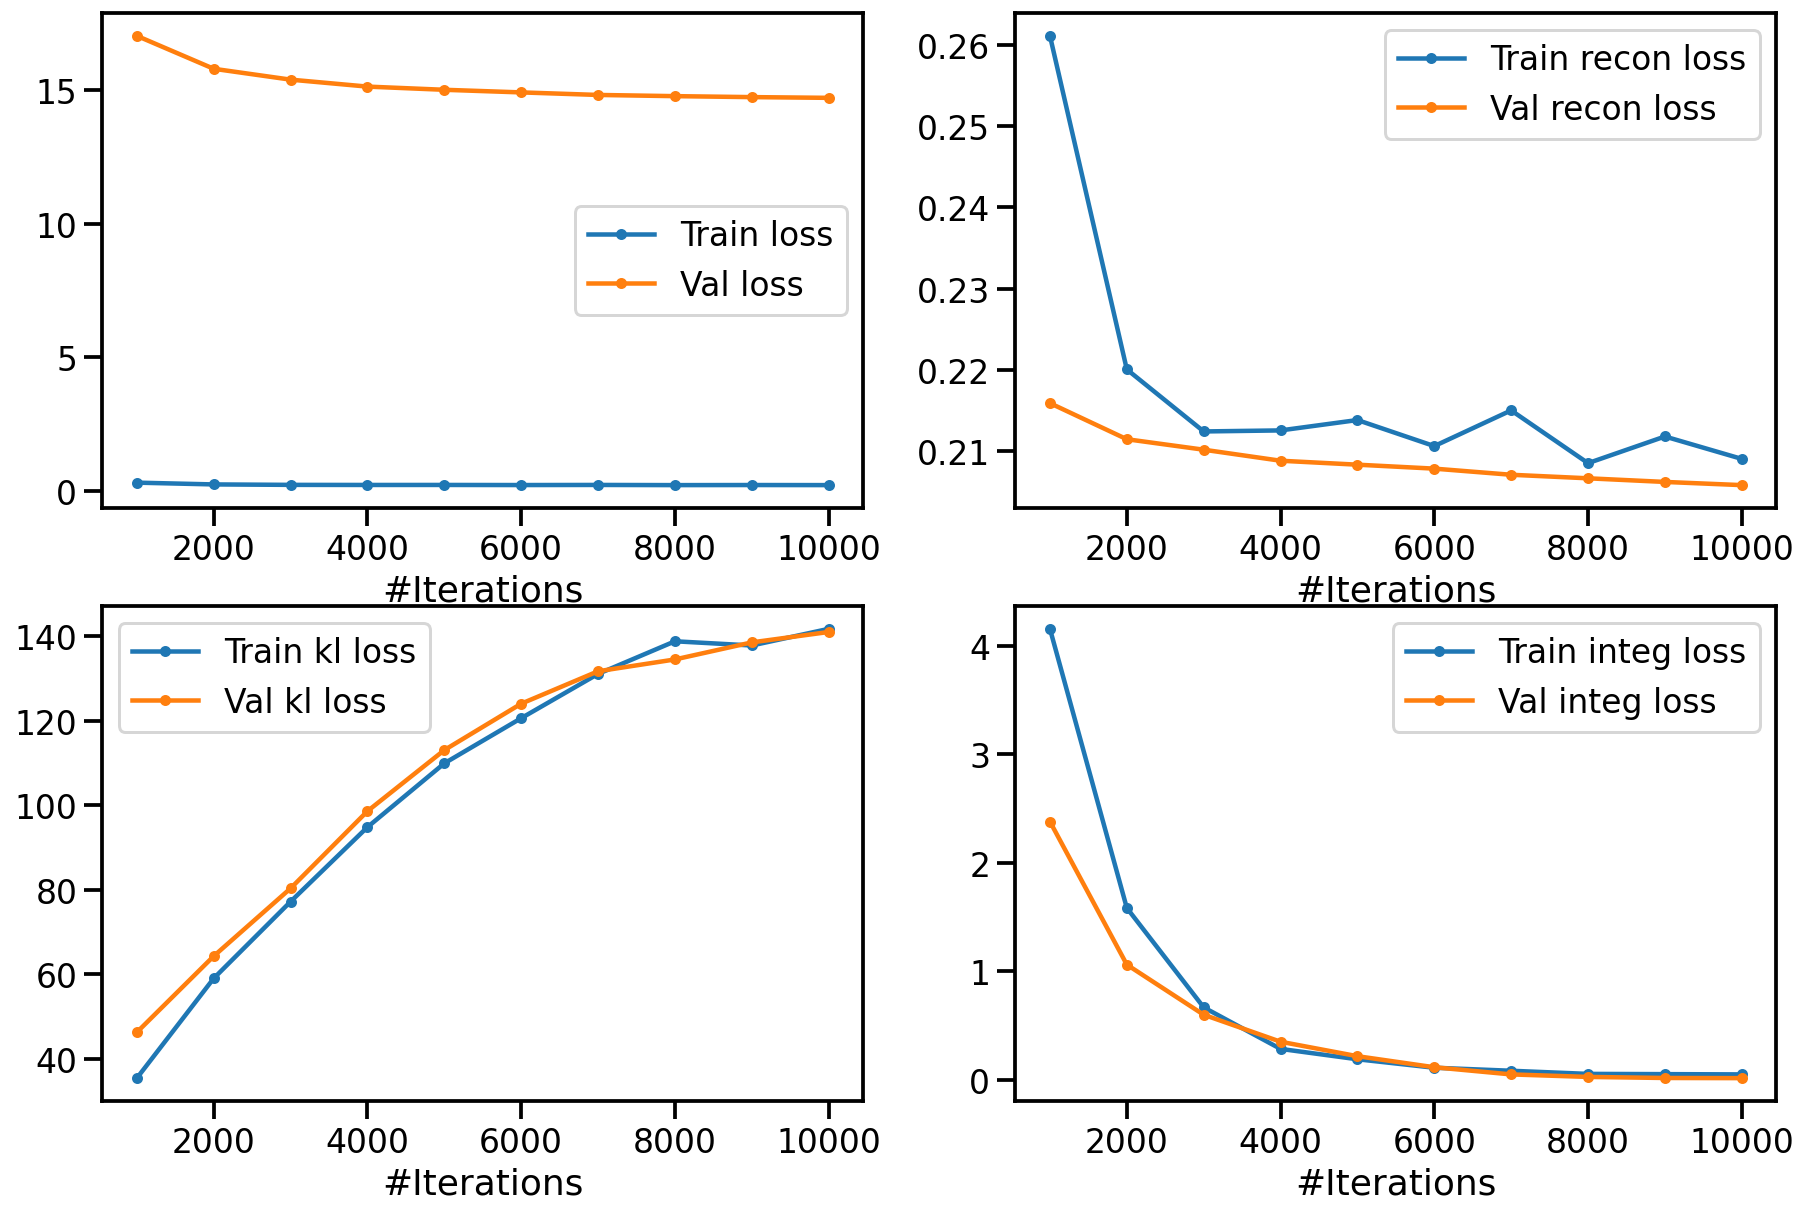

In [10]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(model.history['iteration'], model.history['train_loss'], '.-', label='Train loss');
plt.plot(model.history['iteration'], model.history['val_loss'], '.-', label='Val loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(222);
plt.plot(model.history['iteration'], model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(model.history['iteration'], model.history['val_recon'], '.-', label='Val recon loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(223);
plt.plot(model.history['iteration'], model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(model.history['iteration'], model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(model.history['iteration'], model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(model.history['iteration'], model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

# Validation

In [11]:
z = model.predict(
    adatas=[[scrna], [scatac]],
    names=[['scRNA-seq'], ['scATAC-seq']],
    batch_size=64,
)
z

AnnData object with n_obs × n_vars = 20000 × 20
    obs: 'modality', 'cell_type', 'batch'

In [12]:
sc.pp.neighbors(z)
sc.tl.umap(z)

/Users/alitinet/opt/miniconda3/envs/mulgr/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/Users/alitinet/opt/miniconda3/envs/mulgr/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/Users/alitinet/opt/miniconda3/envs/mulgr/lib/python3.7/site-packages/scanpy/tools/_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


... storing 'modality' as categorical
... storing 'cell_type' as categorical


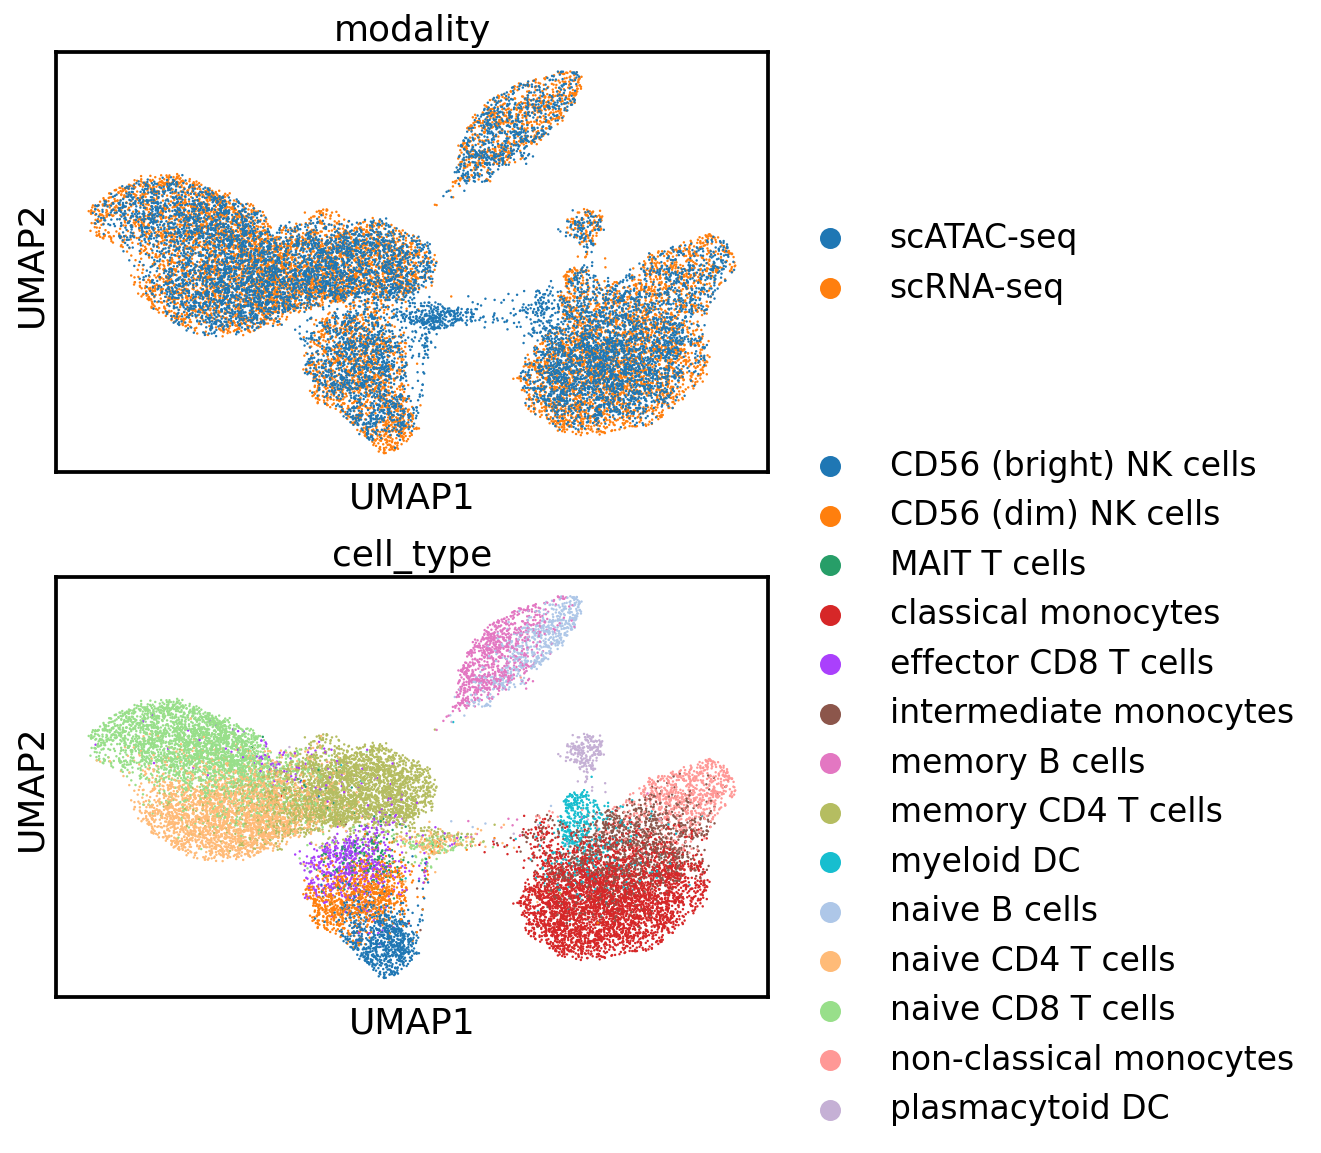

In [13]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

In [14]:
scmulti.metrics.nmi(z, label_key='modality')

2.4718318713065635e-06

In [15]:
scmulti.metrics.asw(z, label_key='modality')

0.0006791786290705204

In [16]:
scmulti.metrics.asw(z, label_key='cell_type')

0.12380161136388779

In [26]:
sc.pp.pca(z)
metrics = scmulti.metrics.scibmetrics.metrics(
    z, z,
    batch_key='modality',
    label_key='cell_type',
    hvg_score_=False,
    nmi_=True,
    ari_=True,
    silhouette_=True,
)
metrics

clustering...


/home/aomidi/.conda/envs/scanpy/lib/python3.7/site-packages/scanpy/tools/_louvain.py:107: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adjacency = adata.uns['neighbors']['connectivities']
/home/aomidi/.conda/envs/scanpy/lib/python3.7/site-packages/scanpy/tools/_louvain.py:107: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adjacency = adata.uns['neighbors']['connectivities']
/home/aomidi/.conda/envs/scanpy/lib/python3.7/site-packages/scanpy/tools/_louvain.py:107: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adjacency = adata.uns['neighbors']['connectivities']
/home/aomidi/.conda/envs/scanpy/lib/python3.7/sit

NMI...
ARI...
silhouette score...


/home/aomidi/.conda/envs/scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/aomidi/.conda/envs/scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/aomidi/.conda/envs/scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/aomidi/.conda/envs/scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/aomidi

,0
NMI_cluster/label,0.670802
ARI_cluster/label,0.503553
ASW_label,0.553201
ASW_label/batch,0.917820
PCR_batch,NaN
cell_cycle_conservation,NaN
isolated_label_F1,NaN
isolated_label_silhouette,NaN
graph_conn,NaN
kBET,NaN
